In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('dataset_phishing.csv')
df.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


In [6]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

#### Descriptive Statistics Summary (Top 10 Numerical Features)

In [62]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# df.describe()
numeric_summary = numeric_df.describe().T

# Add median to the summary
numeric_summary["median"] = numeric_df.median()

numeric_summary = numeric_summary[["mean", "median", "std", "min", "max"]]
numeric_summary.head(10) 

,mean,median,std,min,max
length_url,61.126684,47.0,55.297318,12.0,1641.0
length_hostname,21.090289,19.0,10.777171,4.0,214.0
ip,0.150569,0.0,0.357644,0.0,1.0
nb_dots,2.480752,2.0,1.369686,1.0,24.0
nb_hyphens,0.997550,0.0,2.087087,0.0,43.0
nb_at,0.022222,0.0,0.155500,0.0,4.0
nb_qm,0.141207,0.0,0.364456,0.0,3.0
nb_and,0.162292,0.0,0.821337,0.0,19.0
nb_or,0.000000,0.0,0.000000,0.0,0.0
nb_eq,0.293176,0.0,0.998317,0.0,19.0


Insights:

Most values like ip, nb_at, nb_qm, nb_and have a median of 0, suggesting a right-skewed distribution.

nb_or is constant (always 0), so it offers no variability.

Features like length_url and nb_hyphens show high dispersion, indicating some outliers.

In [10]:
# Frequency distribution of target
print(df['status'].value_counts())

status
legitimate    5715
phishing      5715
Name: count, dtype: int64


#### Histograms for all features

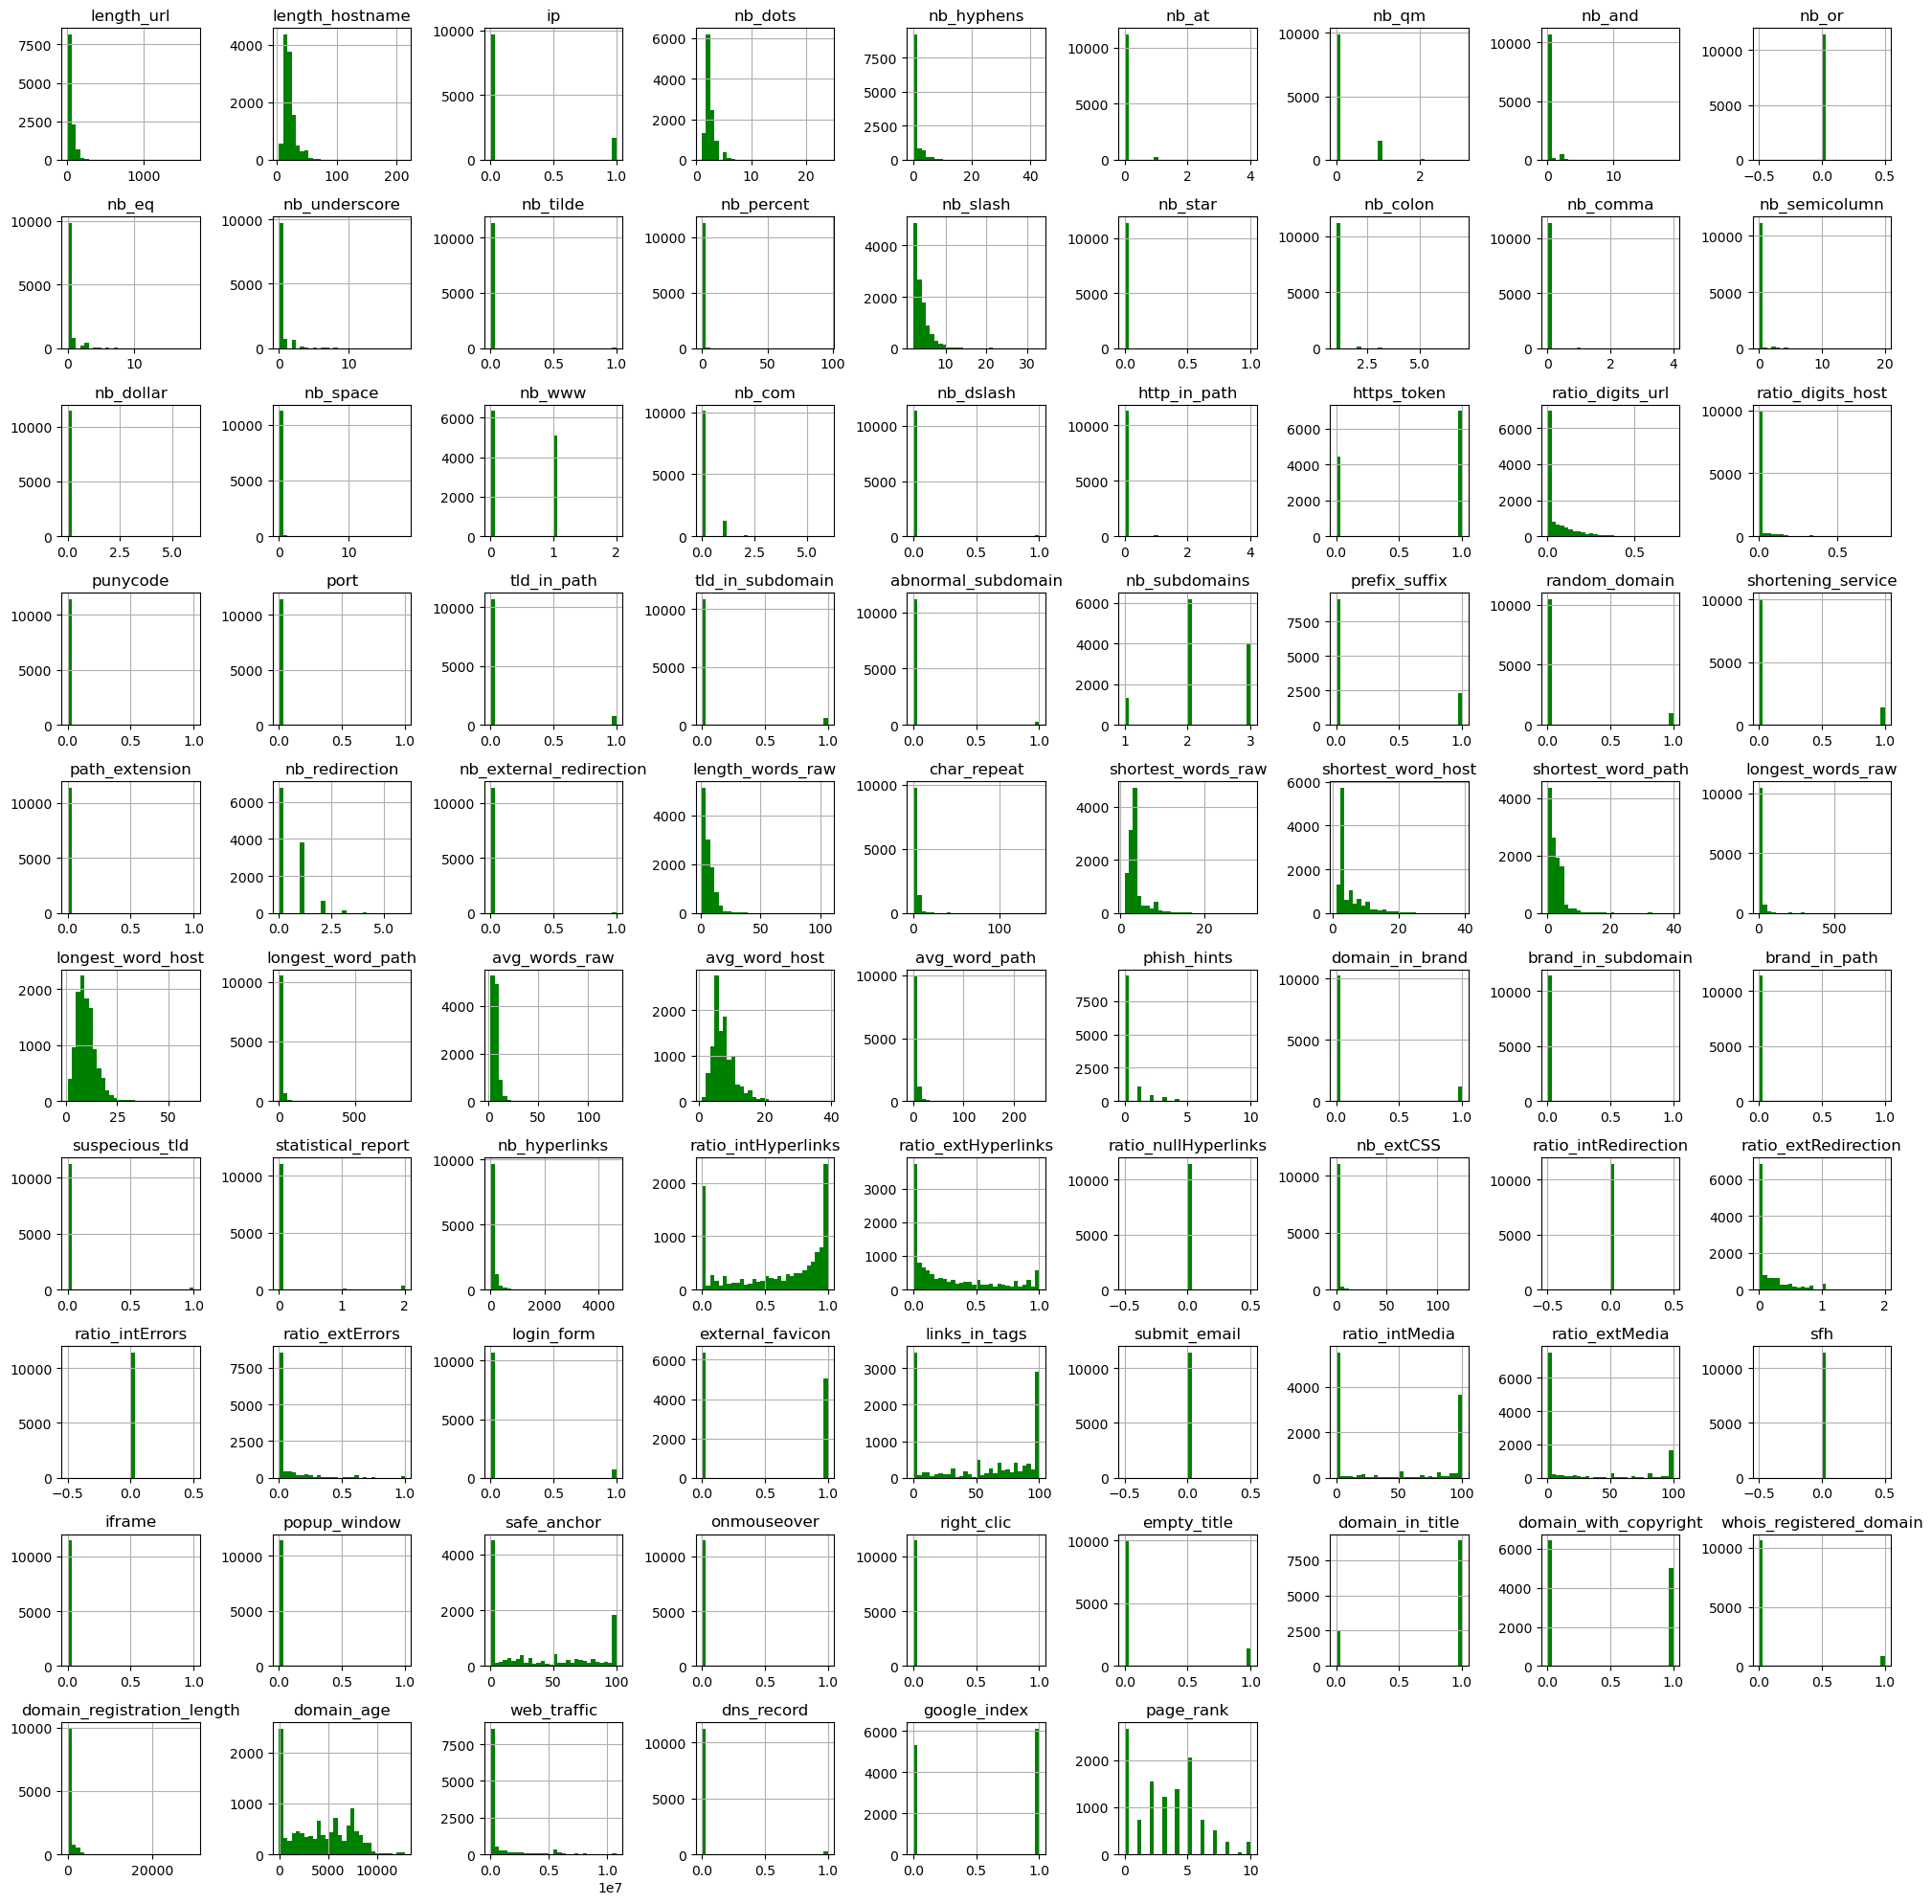

In [14]:
df.hist(figsize=(20,20),bins=30,color='g')
plt.tight_layout()
plt.show()

#### Pair Plot

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

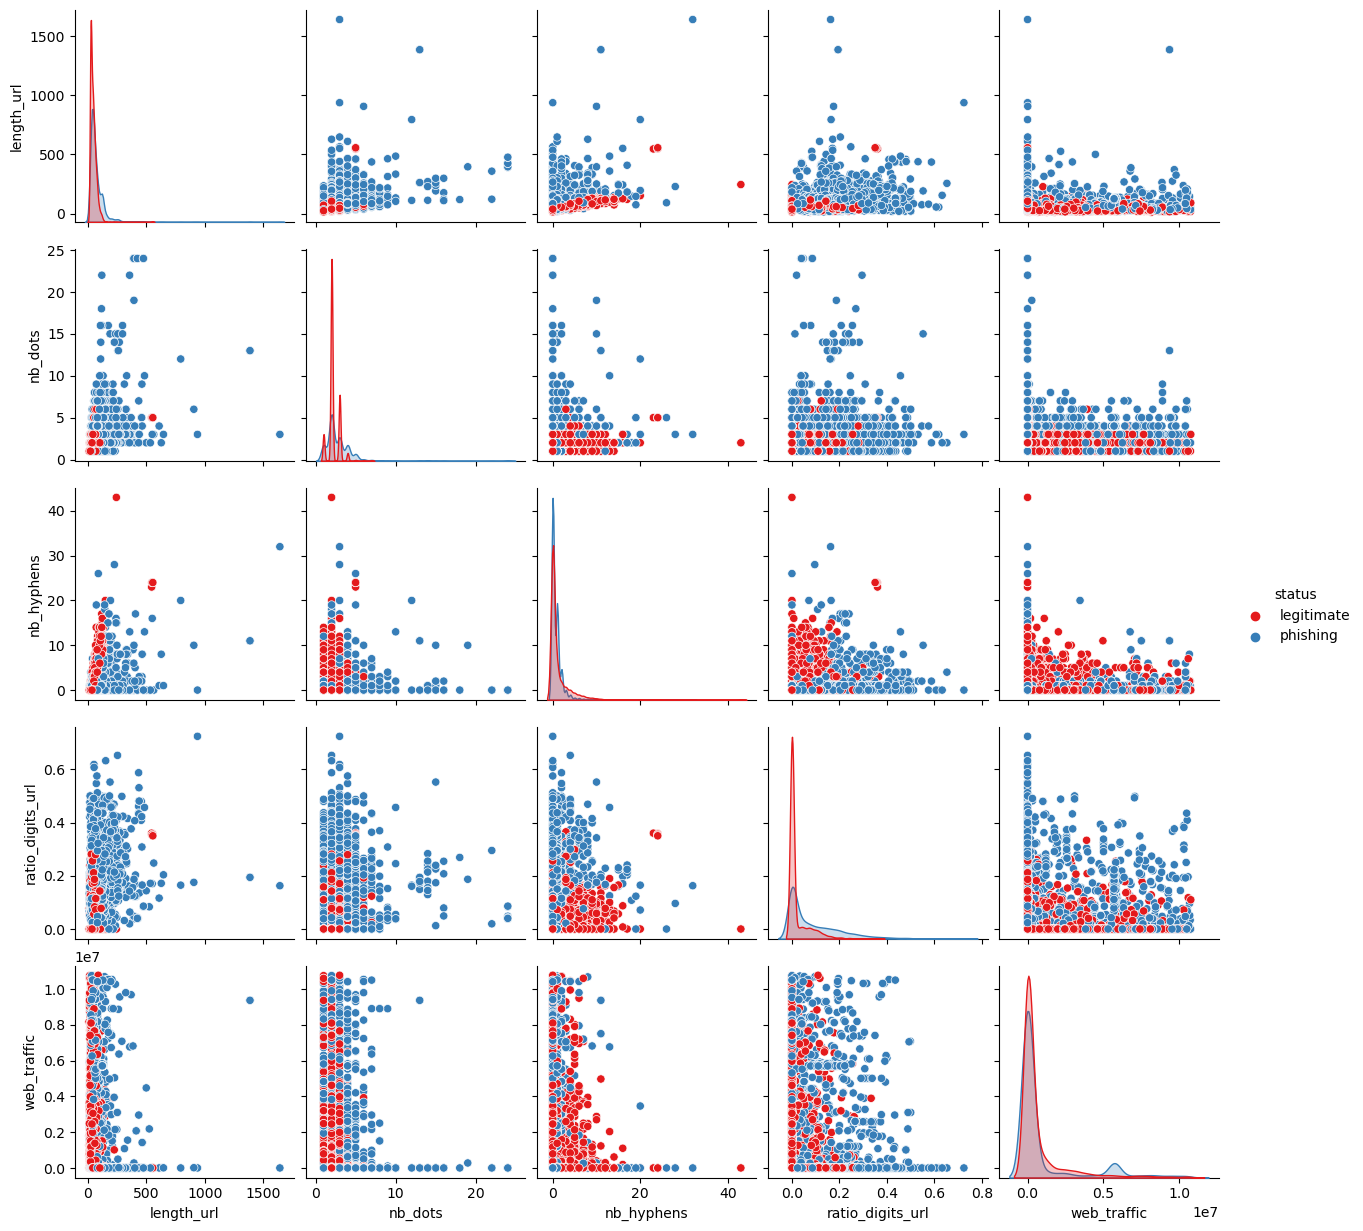

In [16]:
# Select a few meaningful numerical features + target for the pair plot
subset = df[['length_url', 'nb_dots', 'nb_hyphens', 'ratio_digits_url', 'web_traffic','status']]

# Plot the pair plot
sns.pairplot(subset, hue='status', palette='Set1')
plt.show()


#### Correlation Matrix Heatmap

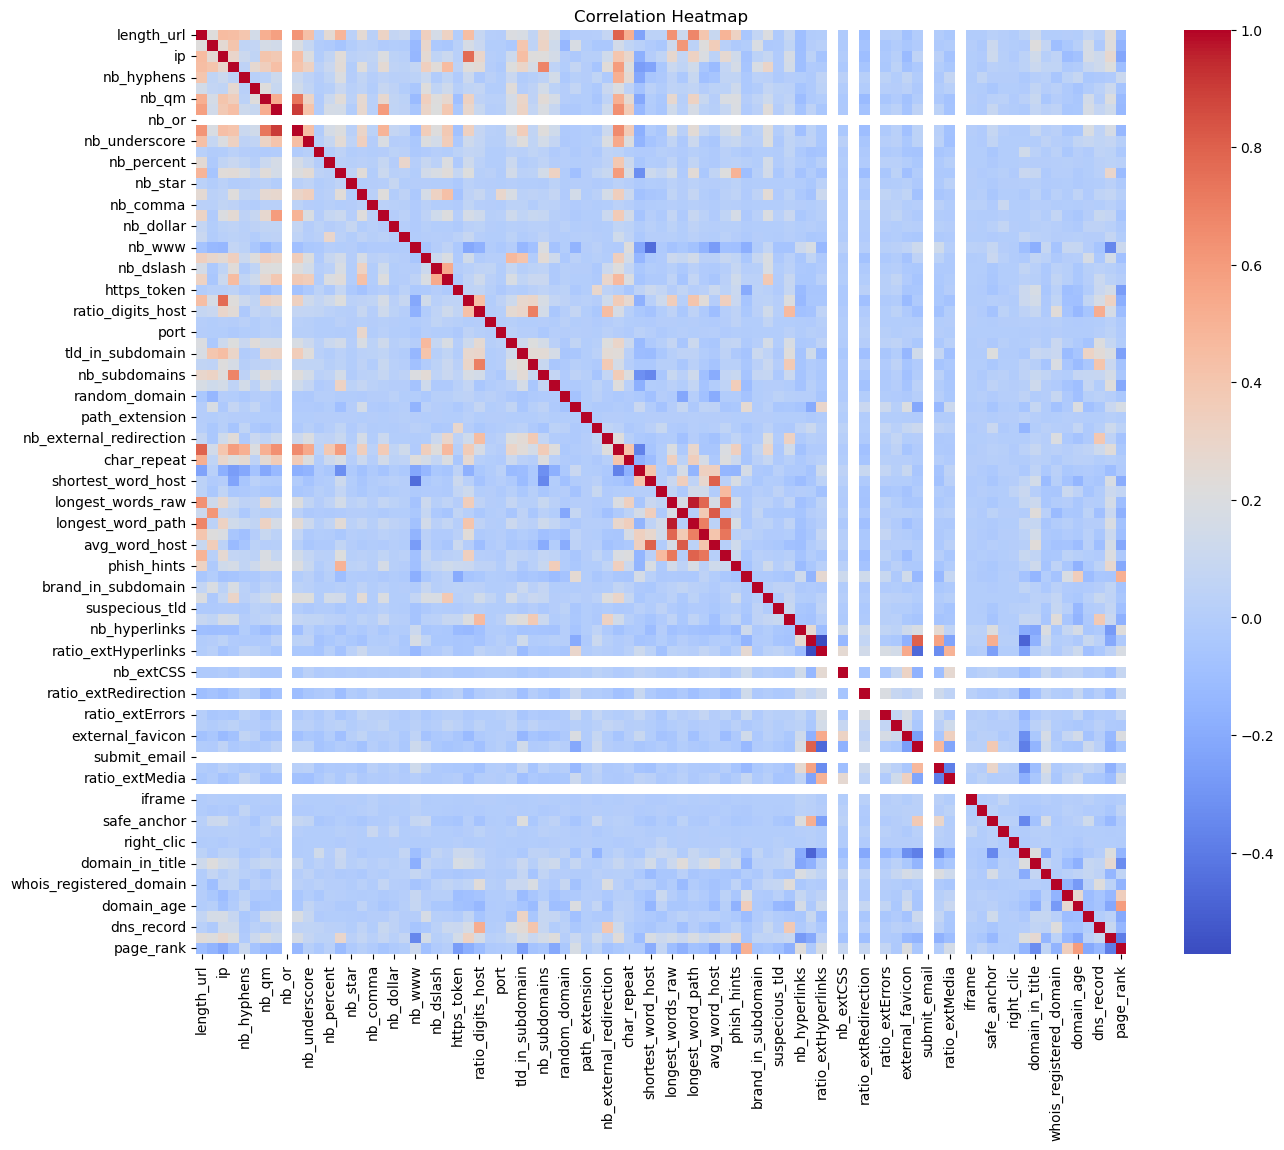

In [17]:
# correlation matrix
corr=df.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
a=sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [22]:
df.dtypes

url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object

In [30]:
from sklearn.preprocessing import LabelEncoder

In [32]:
l=LabelEncoder()

In [40]:
# Convert 'status' column to string and encode it to numeric labels
df['status'] = l.fit_transform(df['status'].astype(str))

In [42]:
print(df['status'].value_counts())

status
0    5715
1    5715
Name: count, dtype: int64


legitimate: 0, phishing: 1

In [50]:
# Strong correlations with status
#This line grabs the correlation values between each feature and the target column (status).
important_corr = df['status'].sort_values(ascending=False)

print("Top features correlated with Result:")
print(important_corr.head(10))

print("\nLeast correlated features with Result:")
print(important_corr.tail(10))


Top features correlated with Result:
11429    1
4741     1
4761     1
4756     1
9054     1
9055     1
4753     1
4751     1
4747     1
9060     1
Name: status, dtype: int32

Least correlated features with Result:
5067    0
5065    0
5064    0
5062    0
5060    0
5059    0
5058    0
5057    0
5056    0
5715    0
Name: status, dtype: int32


In [91]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the DataFrame
df_normalized = df.copy()

# Select numerical features
numerical_cols = df_normalized.select_dtypes(include='number').columns.tolist()

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df_normalized[numerical_cols] = scaler.fit_transform(df_normalized[numerical_cols])

# Confirm it's normalized
print(df_normalized[numerical_cols])

       length_url  length_hostname        ip    nb_dots  nb_hyphens     nb_at  \
0       -0.436327        -0.193964 -0.421020   0.379116   -0.477984 -0.142915   
1        0.287067         0.177207  2.375182  -1.081136   -0.477984 -0.142915   
2        1.173224         2.682613  2.375182   1.109242    0.001174 -0.142915   
3       -0.779940        -0.936306 -0.421020  -0.351010   -0.477984 -0.142915   
4       -0.110800        -0.565135 -0.421020  -0.351010    0.480332 -0.142915   
...           ...              ...       ...        ...         ...       ...   
11425   -0.291649        -0.379549 -0.421020  -0.351010   -0.477984 -0.142915   
11426    0.413661        -0.286757 -0.421020   1.839369   -0.477984  6.288241   
11427    0.793442        -0.472342  2.375182  -0.351010    2.396963 -0.142915   
11428   -0.418243         0.826757 -0.421020  -0.351010   -0.477984 -0.142915   
11429    7.521007        -0.657928  2.375182  15.711766   -0.477984  6.288241   

          nb_qm     nb_and 

Benefits and Reasons for Scaling This Dataset
1. Different Ranges Across Features
In dataset:

length_url may go from 12 to 1641

nb_dots or nb_qm could be 0–10

Without scaling, large features dominate smaller ones and skew the model's learning